<a href="https://colab.research.google.com/github/bernarducs/code_chunks/blob/master/Distancia_Euclidiana_dos_municipios_PE_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando pacotes

In [44]:
import numpy as np # lida com algebra, matrizes
import pandas as pd # lida com tabelas

In [45]:
from numpy import linalg as LA # distancia euclidiana entre dois pontos

In [46]:
# graficos
import seaborn as sns
import matplotlib.pyplot as plt

### municipios sem agências CEF - qual o município mais próximo de cada um desses 20 municipios (em código IBGE)

In [52]:
cd_munic_sem_agencias = [260150, 260240, 260250, 260340, 260370, 260392, 260515, 
                         260545, 260630, 260670, 260700, 260730, 260740, 261030, 
                         261210, 261290, 261400, 261480, 261510, 261618]

Importando arquivo de lat e lng de cada cidade

In [47]:
# arquivo com os pontos de cada municipio de PE
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [48]:
path_data_set = '/content/drive/My Drive/pontos_municipios_bing.csv'
df = pd.read_csv(path_data_set, sep=';', 
                 usecols=['cd_municipio', 'lat_municipio', 'lng_municipio'],
                 index_col='cd_municipio')

df.columns=['lat', 'lng']
df.head(3)

,lat,lng
cd_municipio,,
260005,-7.90525,-34.904499
260010,-7.74939,-37.633610
260020,-8.51642,-41.007938


tipo do dados (se é texto, numero, etc)
aqui latitude e longitude são pontos flutuantes (número com casas decimais == OK, podemos trabalhar.)

In [49]:
df.dtypes

lat    float64
lng    float64
dtype: object

tabela com os nomes dos municipios (iremos usar no final)

In [50]:
path_data_set = '/content/drive/My Drive/municipios_pe.xlsx'
nome_munic = pd.read_excel(path_data_set, index_col='cd_municipio')
nome_munic.head(3)

,NOME_MUNICIPIO
cd_municipio,
260005,ABREU E LIMA
260010,AFOGADOS DA INGAZEIRA
260020,AFRÂNIO


Se plotarmos cada ponto num plano cartesiano, teriamos um mapa de PE!

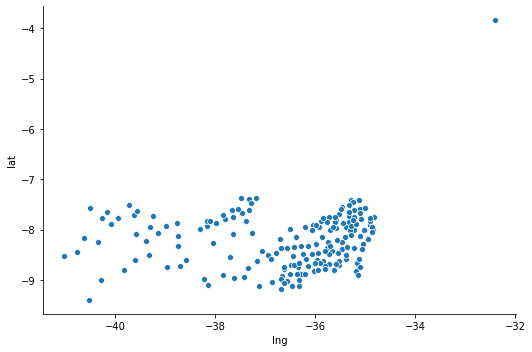

In [51]:
sns.relplot(x="lng", y="lat", data=df, aspect=1.5);

Método: ter uma lista de municípios e seus pontos. Iremos iterar cada municipio (municipio 'a') contra os demais (mun 'v') e extrair suas distâncias euclidianas. Daí checamos qual o município 'v' possui o valor mínimo com o municipio 'a'.

Por fim teremos um dicionario final com o municipio 'a' e seu vizinho 'v' mais próximo.

unindo lat e lng em coordenadas algebricas

In [53]:
coordenadas = {idx: np.array([row.lng, row.lat]) for idx, row in df.iterrows()}

criando lista de municipios para iteração

In [54]:
lista_munic = list(coordenadas.keys())

In [55]:
munic_prox = dict() # dicionario final

for munic in lista_munic:
  a = coordenadas[munic]
  dict_distancias = dict() # dict com todas as distancias

  for k, v in coordenadas.items():
    # excluindo da comparacao se for ele mesmo 
    # e se o outro municipio tambem nao tiver agencia
    if not np.array_equal(a, v) and k not in cd_munic_sem_agencias: 
      # add todas as distancias para um munic 'a'
      dict_distancias[k] = LA.norm(a - v) 

  # add o municipio de distancia minima no dict final
  munic_prox[munic] = min(dict_distancias, key=dict_distancias.get)

jogando o dicionario de vizinhos num dataframe (tabela) e trazendo os nomes dos municipios

In [56]:
vizinhos_cod = pd.DataFrame.from_dict(munic_prox, columns=['munic. próx'], orient='index')

In [57]:
viz = vizinhos_cod.join(nome_munic)

In [58]:
tab_vizinhos = viz.join(nome_munic, on='munic. próx', rsuffix='_PRÓX')
tab_vizinhos.index.name = 'cd_municipio'
tab_vizinhos.head()

,munic. próx,NOME_MUNICIPIO,NOME_MUNICIPIO_PRÓX
cd_municipio,,,
260005,261070,ABREU E LIMA,PAULISTA
260010,261440,AFOGADOS DA INGAZEIRA,SOLIDÃO
260020,261255,AFRÂNIO,SANTA FILOMENA
260030,260080,AGRESTINA,ALTINHO
260040,261000,ÁGUA PRETA,PALMARES


filtrando municipios sem agências da CEF

In [59]:
tab_vizinhos.loc[cd_munic_sem_agencias]

,munic. próx,NOME_MUNICIPIO,NOME_MUNICIPIO_PRÓX
cd_municipio,,,
260150,260870,BELÉM DE MARIA,LAGOA DOS GATOS
260240,261230,BREJÃO,SALOÁ
260250,261360,BREJINHO,SÃO JOSÉ DO EGITO
260340,261570,CALUMBI,TRIUNFO
260370,260100,CANHOTINHO,ANGELIM
260392,260930,CARNAUBEIRA DA PENHA,MIRANDIBA
260515,260020,DORMENTES,AFRÂNIO
260545,260765,FERNANDO DE NORONHA,ITAMBÉ
260630,261430,GRANITO,MOREILÂNDIA
